<h1> Intorduction</h1>
<p>Walmart Technology has been tasked with identifying two groups of people for marketing purposes: People who earn an income of less than USD 50,000 and those who earn more than USD 50,000. To assist in this pursuit, Walmart has developed a means of accessing 40 different demographic and employment related variables for any person they are interested in marketing to. Additionally, Walmart has been able to compile a dataset that provides gold labels for a variety of observations of these 40 variables within the population. Using the dataset given, train and validate a classifier that predicts this outcome. This can be a simple model since you are going to spend a lot of time on task 2. Please feel free to show off your modeling skills if you have time.</p>

<h2>Model fitting pipeline</h2> 
<p>This is an end to end pipeline to fit/refit the model. Feel free to decide what modules are needed. At least 3 should be included: data transformation, model fitting and model evaluation. There are other components will bring you bonus points. </p>


Please change the location for the column and data files as per needed

In [2]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime

<h1>Get the Data</h1>

In [3]:
# Read columns
text_file = open("DataChallenge_MLE\MLE_DS 2\census-income.columns", "r")

colnames= text_file.read().split(',')
colnames = [x.strip() for x in colnames]
colnames = [x.replace("'", "") for x in colnames]


colnames

['age',
 'class of worker',
 'detailed industry recode',
 'detailed occupation recode',
 'education',
 'wage per hour',
 'enroll in edu inst last wk',
 'marital stat',
 'major industry code',
 'major occupation code',
 'race',
 'hispanic origin',
 'sex',
 'member of a labor union',
 'reason for unemployment',
 'full or part time employment stat',
 'capital gains',
 'capital losses',
 'dividends from stocks',
 'tax filer stat',
 'region of previous residence',
 'state of previous residence',
 'detailed household and family stat',
 'detailed household summary in household',
 'instance weight',
 'migration code-change in msa',
 'migration code-change in reg',
 'migration code-move within reg',
 'live in this house 1 year ago',
 'migration prev res in sunbelt',
 'num persons worked for employer',
 'family members under 18',
 'country of birth father',
 'country of birth mother',
 'country of birth self',
 'citizenship',
 'own business or self employed',
 'fill inc questionnaire for veteran

In [4]:
# Read data
census_df = pd.read_csv(r'DataChallenge_MLE\MLE_DS 2\census-income.data', names=colnames)

print("Number of Observations:", census_df.shape)

census_df.head()

Number of Observations: (199523, 42)


age                 class of worker  detailed industry recode  \
0   73                 Not in universe                         0   
1   58  Self-employed-not incorporated                         4   
2   18                 Not in universe                         0   
3    9                 Not in universe                         0   
4   10                 Not in universe                         0   

   detailed occupation recode                   education  wage per hour  \
0                           0        High school graduate              0   
1                          34  Some college but no degree              0   
2                           0                  10th grade              0   
3                           0                    Children              0   
4                           0                    Children              0   

  enroll in edu inst last wk   marital stat          major industry code  \
0            Not in universe        Widowed  Not in universe or children   
1            Not in universe       Divorced                 Construction   
2                High school  Never married  Not in universe or children   
3            Not in universe  Never married  Not in universe or children   
4            Not in universe  Never married  Not in universe or children   

                 major occupation code  ... country of birth father  \
0                      Not in universe  ...           United-States   
1  Precision production craft & repair  ...           United-States   
2                      Not in universe  ...                 Vietnam   
3                      Not in universe  ...           United-States   
4                      Not in universe  ...           United-States   

  country of birth mother country of birth self  \
0           United-States         United-States   
1           United-States         United-States   
2                 Vietnam               Vietnam   
3           United-States         United-States   
4           United-States         United-States   

                           citizenship own business or self employed  \
0    Native- Born in the United States                             0   
1    Native- Born in the United States                             0   
2  Foreign born- Not a citizen of U S                              0   
3    Native- Born in the United States                             0   
4    Native- Born in the United States                             0   

  fill inc questionnaire for veterans admin  veterans benefits  \
0                           Not in universe                  2   
1                           Not in universe                  2   
2                           Not in universe                  2   
3                           Not in universe                  0   
4                           Not in universe                  0   

   weeks worked in year  year     label  
0                     0    95  - 50000.  
1                    52    94  - 50000.  
2                     0    95  - 50000.  
3                     0    94  - 50000.  
4                     0    94  - 50000.  

[5 rows x 42 columns]

In [5]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   age                                        199523 non-null  int64  
 1   class of worker                            199523 non-null  object 
 2   detailed industry recode                   199523 non-null  int64  
 3   detailed occupation recode                 199523 non-null  int64  
 4   education                                  199523 non-null  object 
 5   wage per hour                              199523 non-null  int64  
 6   enroll in edu inst last wk                 199523 non-null  object 
 7   marital stat                               199523 non-null  object 
 8   major industry code                        199523 non-null  object 
 9   major occupation code                      199523 non-null  object 
 10  race    

In [6]:
census_df.describe()

age  detailed industry recode  detailed occupation recode  \
count  199523.000000             199523.000000               199523.000000   
mean       34.494199                 15.352320                   11.306556   
std        22.310895                 18.067129                   14.454204   
min         0.000000                  0.000000                    0.000000   
25%        15.000000                  0.000000                    0.000000   
50%        33.000000                  0.000000                    0.000000   
75%        50.000000                 33.000000                   26.000000   
max        90.000000                 51.000000                   46.000000   

       wage per hour  capital gains  capital losses  dividends from stocks  \
count  199523.000000   199523.00000   199523.000000          199523.000000   
mean       55.426908      434.71899       37.313788             197.529533   
std       274.896454     4697.53128      271.896428            1984.163658   
min         0.000000        0.00000        0.000000               0.000000   
25%         0.000000        0.00000        0.000000               0.000000   
50%         0.000000        0.00000        0.000000               0.000000   
75%         0.000000        0.00000        0.000000               0.000000   
max      9999.000000    99999.00000     4608.000000           99999.000000   

       instance weight  num persons worked for employer  \
count    199523.000000                    199523.000000   
mean       1740.380269                         1.956180   
std         993.768156                         2.365126   
min          37.870000                         0.000000   
25%        1061.615000                         0.000000   
50%        1618.310000                         1.000000   
75%        2188.610000                         4.000000   
max       18656.300000                         6.000000   

       own business or self employed  veterans benefits  weeks worked in year  \
count                  199523.000000      199523.000000         199523.000000   
mean                        0.175438           1.514833             23.174897   
std                         0.553694           0.851473             24.411488   
min                         0.000000           0.000000              0.000000   
25%                         0.000000           2.000000              0.000000   
50%                         0.000000           2.000000              8.000000   
75%                         0.000000           2.000000             52.000000   
max                         2.000000           2.000000             52.000000   

                year  
count  199523.000000  
mean       94.499672  
std         0.500001  
min        94.000000  
25%        94.000000  
50%        94.000000  
75%        95.000000  
max        95.000000

Dropping rows with NaN values

In [7]:
print(f"Number of rows before dorpping NaN: {census_df.shape[0]}")
census_df = census_df.dropna()
print(f"Number of rows after dorpping NaN: {census_df.shape[0]}")

Number of rows before dorpping NaN: 199523
Number of rows after dorpping NaN: 198649


Number or rows lost were acceptable. Moving forward with next steps

<h1>Data Exploration and Transformation</h1>

In [8]:
#Separate categorical and numberical columns
census_cat_col = census_df.dtypes[census_df.dtypes == 'object']
census_num_col = census_df.dtypes[census_df.dtypes != 'object']

<h2>Numerical columns</h2>

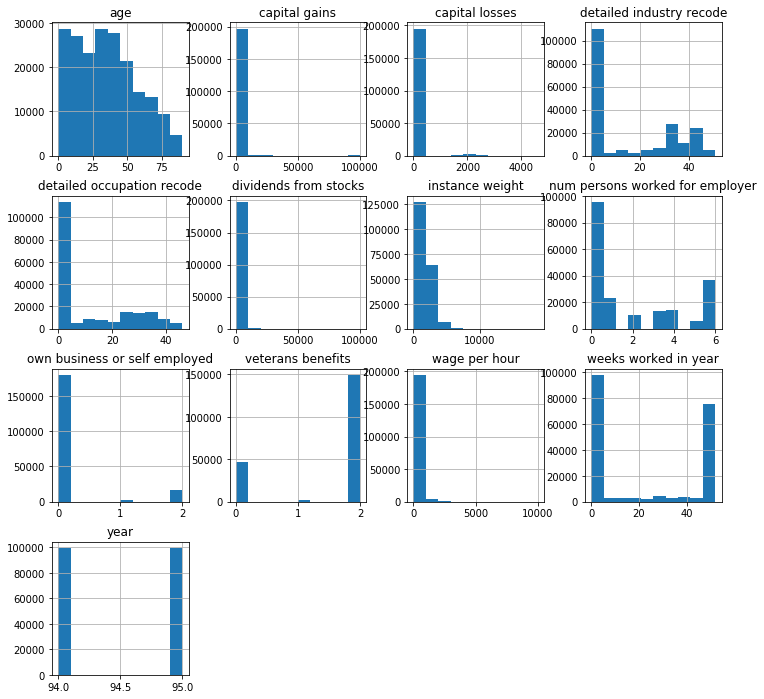

In [9]:
census_df[list(census_num_col.index)].hist(figsize = (12,12));

age: In our dataset mostly People from age group of 18 to 60 can be observed.<br>
weeks worked in a year: Generally people can be seen working for 30 hours to 40 hours per week.<br>
some of these columns are actually categories eg<br>
year<br>
veterans benefits<br>
own business or self employed<br>
<br>
Also accodring to the cencus website the following columns are categories<br>
ref : https://www.census.gov/topics/employment/industry-occupation/guidance/code-lists.html<br>
detailed industry recode<br>
detailed occupation recode<br>

In [10]:
# converting above mentioned columns to categories
census_df['year'] = census_df['year'].astype(str)
census_df['veterans benefits'] = census_df['veterans benefits'].astype(str)
census_df['own business or self employed'] = census_df['own business or self employed'].astype(str)
census_df['detailed industry recode'] = census_df['detailed industry recode'].astype(str)
census_df['detailed occupation recode'] = census_df['detailed occupation recode'].astype(str)

In [11]:
# New categorical and numberical columns
census_cat_col = census_df.dtypes[census_df.dtypes == 'object']
census_num_col = census_df.dtypes[census_df.dtypes != 'object']

<h2>Numerical Column Feature selection</h2>
<p> we will use correlation matrix to remove features which are hightly correlated with eachother</p>

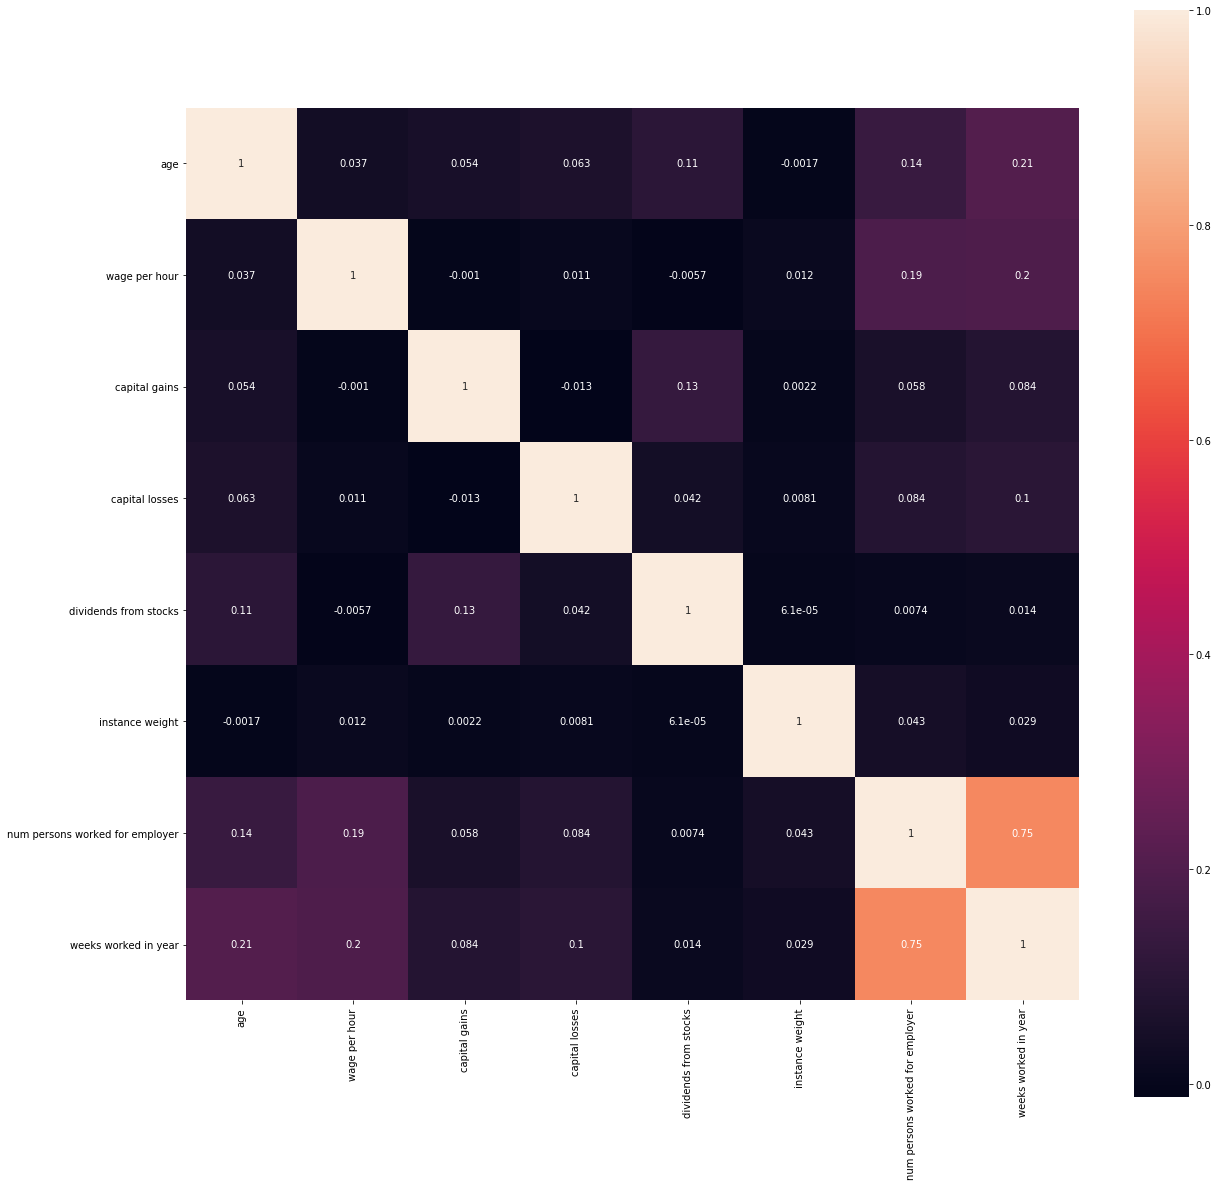

In [12]:
fig = plt.figure(figsize = (20,20))

sns.heatmap(census_df[list(census_num_col.index)].corr(),annot = True,square = True);

Seems 'weeks worked in year' is highly correlated with number of 'persons worked for employer' <br>
we could drop one of them as the other might not add much value

In [13]:
keep_columns_numerical = list(census_num_col.index)
keep_columns_numerical.remove("num persons worked for employer")
# removing instance weight as it is not a relevant feature
keep_columns_numerical.remove("instance weight")

print("Numerical Columns to keep")
print(keep_columns_numerical)

Numerical Columns to keep
['age', 'wage per hour', 'capital gains', 'capital losses', 'dividends from stocks', 'weeks worked in year']


<h2>Categorical Columns</h2>

Exploring data in categorical variables by looking at how the data is distributed

In [14]:
for _col in list(census_cat_col.index):
    print(f"--------------------{_col.title()}-------------------------")
    _total= census_df[_col].value_counts()
    _percent = (census_df[_col].value_counts() / census_df.shape[0]) * 100
    _df = pd.concat([_total,_percent],keys = ['total','percent'],axis = 1)
    print(_df)
    print('\n')

--------------------Class Of Worker-------------------------
                                total    percent
Not in universe                 99800  50.239367
Private                         71705  36.096331
Self-employed-not incorporated   8411   4.234101
Local government                 7752   3.902360
State government                 4216   2.122336
Self-employed-incorporated       3248   1.635045
Federal government               2914   1.466909
Never worked                      438   0.220489
Without pay                       165   0.083061


--------------------Detailed Industry Recode-------------------------
     total    percent
0   100238  50.459856
33   16986   8.550760
43    8246   4.151040
4     5955   2.997750
42    4657   2.344336
45    4463   2.246676
29    4191   2.109751
37    4011   2.019139
41    3941   1.983901
32    3579   1.801670
35    3365   1.693943
39    2930   1.474963
34    2759   1.388882
44    2540   1.278637
2     2187   1.100937
11    1755   0.883468
50 

                              total    percent
Nonfiler                      74784  37.646301
Joint both under 65           67125  33.790757
Single                        37223  18.738076
Joint both 65+                 8288   4.172183
Head of household              7393   3.721640
Joint one under 65 & one 65+   3836   1.931044


--------------------Region Of Previous Residence-------------------------
                  total    percent
Not in universe  183062  92.153497
South              4835   2.433941
West               4029   2.028200
Midwest            3513   1.768446
Northeast          2682   1.350120
Abroad              528   0.265795


--------------------State Of Previous Residence-------------------------
                       total    percent
Not in universe       183062  92.153497
California              1691   0.851250
Utah                    1055   0.531087
Florida                  840   0.422856
North Carolina           804   0.404734
?                        703   0.35

    total    percent
0  179880  90.551677
2   16085   8.097197
1    2684   1.351127


--------------------Fill Inc Questionnaire For Veterans Admin-------------------------
                  total    percent
Not in universe  196678  99.007798
No                 1583   0.796883
Yes                 388   0.195319


--------------------Veterans Benefits-------------------------
    total    percent
2  149443  75.229676
0   47235  23.778121
1    1971   0.992202


--------------------Year-------------------------
    total    percent
95  99512  50.094388
94  99137  49.905612


--------------------Label-------------------------
           total    percent
- 50000.  186324  93.795589
50000+.    12325   6.204411




In [15]:
# Replace ? with Unknown
for col in list(census_cat_col.index):
    census_df.loc[census_df[col] == '?', col] = 'unknown'

In [16]:
# Check if ? is present
for col in census_cat_col.index:
    print(f"? in {col}: {census_df[(census_df[col] == '?')].any().sum()}")

? in class of worker: 0
? in detailed industry recode: 0
? in detailed occupation recode: 0
? in education: 0
? in enroll in edu inst last wk: 0
? in marital stat: 0
? in major industry code: 0
? in major occupation code: 0
? in race: 0
? in hispanic origin: 0
? in sex: 0
? in member of a labor union: 0
? in reason for unemployment: 0
? in full or part time employment stat: 0
? in tax filer stat: 0
? in region of previous residence: 0
? in state of previous residence: 0
? in detailed household and family stat: 0
? in detailed household summary in household: 0
? in migration code-change in msa: 0
? in migration code-change in reg: 0
? in migration code-move within reg: 0
? in live in this house 1 year ago: 0
? in migration prev res in sunbelt: 0
? in family members under 18: 0
? in country of birth father: 0
? in country of birth mother: 0
? in country of birth self: 0
? in citizenship: 0
? in own business or self employed: 0
? in fill inc questionnaire for veterans admin: 0
? in vetera

In [17]:
for _col in list(census_cat_col.index):
    print(f"--------------------{_col.title()}-------------------------")
    _total= census_df[_col].value_counts()
   
    _percent = (census_df[_col].value_counts() / census_df.shape[0]) * 100
    _df = pd.concat([_total,_percent],keys = ['total','percent'], axis = 1)
    print(_df)
    print('\n')

--------------------Class Of Worker-------------------------
                                total    percent
Not in universe                 99800  50.239367
Private                         71705  36.096331
Self-employed-not incorporated   8411   4.234101
Local government                 7752   3.902360
State government                 4216   2.122336
Self-employed-incorporated       3248   1.635045
Federal government               2914   1.466909
Never worked                      438   0.220489
Without pay                       165   0.083061


--------------------Detailed Industry Recode-------------------------
     total    percent
0   100238  50.459856
33   16986   8.550760
43    8246   4.151040
4     5955   2.997750
42    4657   2.344336
45    4463   2.246676
29    4191   2.109751
37    4011   2.019139
41    3941   1.983901
32    3579   1.801670
35    3365   1.693943
39    2930   1.474963
34    2759   1.388882
44    2540   1.278637
2     2187   1.100937
11    1755   0.883468
50 

                                     total    percent
Children or Armed Forces            123052  61.944435
Full-time schedules                  40671  20.473801
Not in labor force                   26726  13.453881
PT for non-econ reasons usually FT    3319   1.670786
Unemployed full-time                  2308   1.161848
PT for econ reasons usually PT        1207   0.607604
Unemployed part- time                  843   0.424367
PT for econ reasons usually FT         523   0.263278


--------------------Tax Filer Stat-------------------------
                              total    percent
Nonfiler                      74784  37.646301
Joint both under 65           67125  33.790757
Single                        37223  18.738076
Joint both 65+                 8288   4.172183
Head of household              7393   3.721640
Joint one under 65 & one 65+   3836   1.931044


--------------------Region Of Previous Residence-------------------------
                  total    percent
Not in unive

                                   total    percent
Not in universe under 1 year old  101021  50.854019
Yes                                82041  41.299478
No                                 15587   7.846503


--------------------Migration Prev Res In Sunbelt-------------------------
                 total    percent
unknown          99512  50.094388
Not in universe  83550  42.059109
No                9863   4.965039
Yes               5724   2.881464


--------------------Family Members Under 18-------------------------
                         total    percent
Not in universe         143562  72.269178
Both parents present     38850  19.557108
Mother only present      12725   6.405771
Father only present       1870   0.941359
Neither parent present    1642   0.826584


--------------------Country Of Birth Father-------------------------
                               total    percent
United-States                 158449  79.763301
Mexico                          9969   5.018399
unknown

<p> We obserseved a lot of columns with values 'Not in Univrse'.</p>
<p>It seems like these columns won't add much values to the analysis as the thing we are predicting is the income group.</p>
<p>Like what Clyde Schechter says, which re-inforces my opinion</p>
<i>There are some things that are inherently "not in universe/not applicable," such as the value for a pregnancy variable when the respondent is male. And certainly you would want to exclude males from any analyses you did that involved pregnancy.

Other things are "not in universe/not applicable" because the study for which the data was collected had inclusion criteria that define this case as being not part of the population being studied. If the data was collected and coded with your specific research questions in mind, then, yes, you must exclude any cases that are "not in universe" from analyses that use that variable. However, "not in universe" might just mean that the case in question does not meet eligibility requirements for inclusion in the analysis for which the data was originally collected. If you are doing different analyses not contemplated by those who originally created the data set, these same cases may be eligible for your study. So you need to figure out how the inclusion criteria for the original analyses match up with those for your own, and how those apply to these specific cases.

That said, of course, "not in universe/not applicable" does not provide you with much information to use if you conclude that these cases are includable in your study. If that situation, then you would need to try to find the actual value of the unmeasured variable. In practice, that may not be possible. You will then have to choose between keeping this coded as a missing value (which will cause Stata to automatically exclude it from pretty much any analyses it does), or you will have to use some kind of imputation to fill it in.
    ref: https://www.statalist.org/forums/forum/general-stata-discussion/general/1328514-variable-value-not-in-universe
</i>
    
   <p> We decided to remove the columns that had 50% or close to 50% data with no values '?' or 'Not in Universe' values </p>

Columns we can removethe columns below with what we found above
<br>
["Class Of Worker", "Enroll In Edu Inst Last Wk", "Major Industry Code", "Major Occupation Code", "Member Of A Labor Union", "Reason For Unemployment", "Region Of Previous Residence", "State Of Previous Residence", "Migration Code-Change In Msa", "Migration Code-Change In Reg", "Migration Code-Move Within Reg", "Migration Prev Res In Sunbelt", "Family Members Under 18", "Fill Inc Questionnaire For Veterans Admin", "Live In This House 1 Year Ago"]

Note: we might not keep column 'Live In This House 1 Year Ago' becuase it added little value, because the infromation for 'not in universe' and information for 'under 1 year' was mixed together

<h2>Categorial Column Feature Selection</h2>
    <p>Let's check with chi-square test which columns are worth keeping</p>

In [18]:
# example of chi squared feature selection for categorical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

# prepare input data
def prepare_inputs(X_train, X_test):

    X_train_enc = X_train.apply(LabelEncoder().fit_transform)
    X_test_enc = X_test.apply(LabelEncoder().fit_transform)
    return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [19]:
# load the dataset
_y = census_df["label"]   

_all_columns = list(census_cat_col.index)
_all_columns.remove("label")
_X = census_df[_all_columns]


Feature 0: 466.070673 0.000000
Feature 1: 92768.171205 0.000000
Feature 2: 52504.401306 0.000000
Feature 3: 2107.863258 0.000000
Feature 4: 35.228791 0.000000
Feature 5: 2119.435348 0.000000
Feature 6: 1206.573725 0.000000
Feature 7: 807.167994 0.000000
Feature 8: 46.564684 0.000000
Feature 9: 2433.332494 0.000000
Feature 10: 1714.163286 0.000000
Feature 11: 23.727180 0.000001
Feature 12: 0.124635 0.724061
Feature 13: 87.054713 0.000000
Feature 14: 1547.518704 0.000000
Feature 15: 0.000053 0.994210
Feature 16: 34.461262 0.000000
Feature 17: 4360.743338 0.000000
Feature 18: 712.814844 0.000000
Feature 19: 26.934386 0.000000
Feature 20: 2.958467 0.085429
Feature 21: 3.434238 0.063858
Feature 22: 12.223420 0.000472
Feature 23: 14.372333 0.000150
Feature 24: 2543.496184 0.000000
Feature 25: 88.015744 0.000000
Feature 26: 55.422227 0.000000
Feature 27: 16.281809 0.000055
Feature 28: 7.617336 0.005781
Feature 29: 335.156682 0.000000
Feature 30: 0.777426 0.377930
Feature 31: 1255.170096 0.000

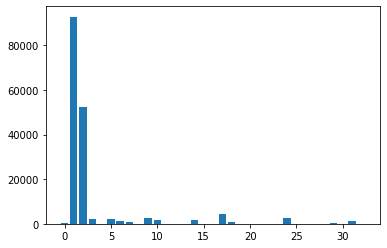

In [20]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(_X,_y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features and p values
for i in range(len(fs.scores_)):
    print('Feature %d: %f %f' % (i, fs.scores_[i], fs.pvalues_[i]))
    
    
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

With more that 30 features we could drop some features with low chi square score and low fill rate.<br>
<b>Note: Fill rate is derived from the 'not in universe' analysis we did above</b><br>
Previous analysis along with the chi square test surmises that we can drop the following columns
"class of worker", "enroll in edu inst last wk", "major industry code", "major occupation code", "member of a labor union", "reason for unemployment", "region of previous residence", "state of previous residence", "migration code-change in msa", "migration code-change in reg", "migration code-move within reg", "migration prev res in sunbelt", "family members under 18", "fill inc questionnaire for veterans admin", "live in this house 1 year ago", "Veterans Benefits"

In [21]:
# Dropping categorical columns with low fill rate or low chi square value

y_new = census_df["label"]             

X_new = census_df[_all_columns]

print(f"Number of columns before deleting: {X_new.shape[1]}")
del_cols = ["class of worker", "enroll in edu inst last wk", "major industry code", "major occupation code", "member of a labor union", "reason for unemployment", "region of previous residence", "state of previous residence", "migration code-change in msa", "migration code-change in reg", "migration code-move within reg", "migration prev res in sunbelt", "family members under 18", "fill inc questionnaire for veterans admin", "live in this house 1 year ago", "citizenship", "veterans benefits"]
X_new = X_new.drop(labels = del_cols,axis = 1,inplace = False)
print(f"Number of columns after deleting: {X_new.shape[1]}")

Number of columns before deleting: 33
Number of columns after deleting: 16


Feature 0: 92768.171205 0.000000
Feature 1: 52504.401306 0.000000
Feature 2: 2107.863258 0.000000
Feature 3: 2119.435348 0.000000
Feature 4: 46.564684 0.000000
Feature 5: 2433.332494 0.000000
Feature 6: 1714.163286 0.000000
Feature 7: 87.054713 0.000000
Feature 8: 1547.518704 0.000000
Feature 9: 4360.743338 0.000000
Feature 10: 712.814844 0.000000
Feature 11: 88.015744 0.000000
Feature 12: 55.422227 0.000000
Feature 13: 16.281809 0.000055
Feature 14: 335.156682 0.000000
Feature 15: 11.859840 0.000574


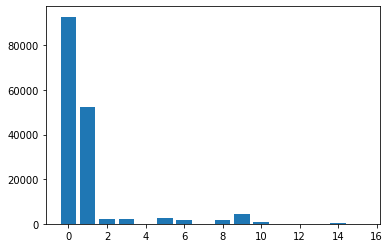

In [22]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features and p values
for i in range(len(fs.scores_)):
    print('Feature %d: %f %f' % (i, fs.scores_[i], fs.pvalues_[i]))
    
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [23]:
print("Columns to keep")
keep_columns_categorical = list(X_new.columns)
print(keep_columns_categorical)

Columns to keep
['detailed industry recode', 'detailed occupation recode', 'education', 'marital stat', 'race', 'hispanic origin', 'sex', 'full or part time employment stat', 'tax filer stat', 'detailed household and family stat', 'detailed household summary in household', 'country of birth father', 'country of birth mother', 'country of birth self', 'own business or self employed', 'year']


In [24]:
X_train_enc.head()

detailed industry recode  detailed occupation recode  education  \
164309                         0                           0          7   
153774                         0                           0         10   
72347                          0                           0         12   
181745                         0                           0         10   
122656                        39                          16          9   

        marital stat  race  hispanic origin  sex  \
164309             2     4                0    0   
153774             4     2                0    0   
72347              5     4                8    0   
181745             4     4                0    1   
122656             2     4                0    0   

        full or part time employment stat  tax filer stat  \
164309                                  0               2   
153774                                  0               4   
72347                                   0               4   
181745                                  0               4   
122656                                  0               2   

        detailed household and family stat  \
164309                                  19   
153774                                   8   
72347                                   19   
181745                                   8   
122656                                  36   

        detailed household summary in household  country of birth father  \
164309                                        4                       39   
153774                                        2                       13   
72347                                         4                       42   
181745                                        2                       39   
122656                                        7                       39   

        country of birth mother  country of birth self  \
164309                       39                     39   
153774                       13                     13   
72347                        42                     42   
181745                       39                     39   
122656                       39                     39   

        own business or self employed  year  
164309                              0     0  
153774                              0     1  
72347                               0     0  
181745                              0     0  
122656                              0     0

<h5>1. Since "country of birth mother", "country of birth father", "country of birth self" seem very similar let's see if they are correlated with the dummies we created above</h5>

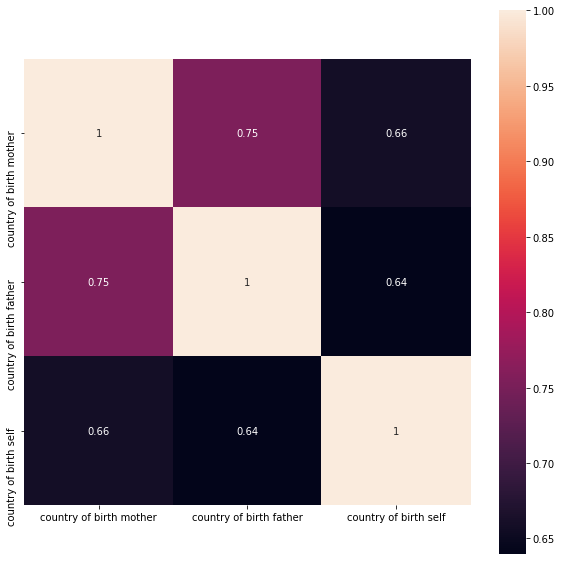

In [25]:
fig = plt.figure(figsize = (10,10))

sns.heatmap(X_train_enc[["country of birth mother", "country of birth father", "country of birth self"]].corr(),annot = True,square = True);

As we can see they have high correlation and one of them could be dropped. We will keep the column "country of birth father" and drop the other two

<h5>2. Since "detailed industry recode", "detailed occupation recode" seem very similar let's see if they are correlated with the dummies we created above</h5>

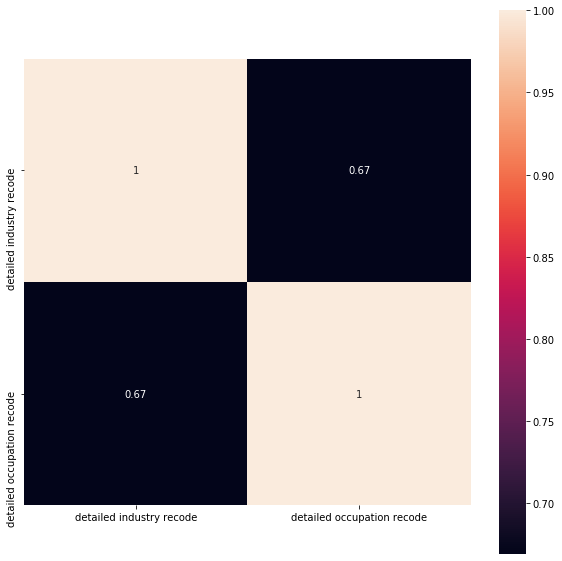

In [26]:
fig = plt.figure(figsize = (10,10))

sns.heatmap(X_train_enc[["detailed industry recode", "detailed occupation recode"]].corr(),annot = True,square = True);

As we can see they have high correlation and one of them could be dropped. We will keep the column "detailed industry recode" and drop the other two

In [27]:
keep_columns_categorical.remove("detailed occupation recode")
keep_columns_categorical.remove("country of birth mother")
keep_columns_categorical.remove("country of birth self")
print(keep_columns_categorical)

['detailed industry recode', 'education', 'marital stat', 'race', 'hispanic origin', 'sex', 'full or part time employment stat', 'tax filer stat', 'detailed household and family stat', 'detailed household summary in household', 'country of birth father', 'own business or self employed', 'year']


<h6> Let's look at the categories once again</h6>

In [28]:
for _col in keep_columns_categorical:
    print(f"--------------------{_col.title()}-------------------------")
    _total= census_df[_col].value_counts()
   
    _percent = (census_df[_col].value_counts() / census_df.shape[0]) * 100
    _df = pd.concat([_total,_percent],keys = ['total','percent'], axis = 1)
    print(_df)
    print('\n')

--------------------Detailed Industry Recode-------------------------
     total    percent
0   100238  50.459856
33   16986   8.550760
43    8246   4.151040
4     5955   2.997750
42    4657   2.344336
45    4463   2.246676
29    4191   2.109751
37    4011   2.019139
41    3941   1.983901
32    3579   1.801670
35    3365   1.693943
39    2930   1.474963
34    2759   1.388882
44    2540   1.278637
2     2187   1.100937
11    1755   0.883468
50    1699   0.855277
40    1645   0.828094
47    1639   0.825073
38    1626   0.818529
24    1494   0.752080
12    1343   0.676067
19    1335   0.672040
31    1175   0.591496
30    1174   0.590992
25    1079   0.543169
9      990   0.498366
22     946   0.476217
36     941   0.473700
13     895   0.450543
1      823   0.414299
48     652   0.328217
27     623   0.313618
49     608   0.306067
3      562   0.282911
21     555   0.279387
5      553   0.278380
6      552   0.277877
8      549   0.276367
16     536   0.269823
23     522   0.262775
18    

<h2> Collapsing categories</h2>

Now let us reduce the number of catagories in some of these columns. <br>
We will do this by labelling categories that contribute to less than 1% of the data to "other"

In [29]:
other = ["11", "50", "40", "47", "38", "24", "12", "19", "31", "30", "25", "9", "22", "36", "13", "1", "48", "27", "49", "3", "21", "5", "6", "8", "16", "23", "18", "15", "7", "14", "46", "17", "28", "26", "51", "20", "10"]

# replace elements in list.
census_df['detailed industry recode'].replace(to_replace = other,value = 'other',inplace = True)

census_df['detailed industry recode'].value_counts()

0        100238
other     28601
33        16986
43         8246
4          5955
42         4657
45         4463
29         4191
37         4011
41         3941
32         3579
35         3365
39         2930
34         2759
44         2540
2          2187
Name: detailed industry recode, dtype: int64

Education<br>

"high school graduate", "12th grade no diploma", "9th grade", "10th grade", "11th grade" comes under HighSchool Grad but it has mentioned separately<br>
Create Elementary object for "7th and 8th grade", "5th or 6th grade", "1st 2nd 3rd or 4th grade", "less than 1st grade"

In [30]:
hs_grad = ["high school graduate", "high school graduate", "12th grade no diploma", "9th grade", "10th grade", "11th grade"]
elementary = ["7th and 8th grade", "5th or 6th grade", "1st 2nd 3rd or 4th grade", "less than 1st grade"]
# replace elements in list.
census_df['education'] = census_df['education'].str.lower()
census_df['education'].replace(to_replace = hs_grad,value = 'HS_grad',inplace = True)
census_df['education'].replace(to_replace = elementary,value = 'elementary_school',inplace = True)

census_df['education'].value_counts()

HS_grad                                   70881
children                                  47248
some college but no degree                27682
bachelors degree(ba ab bs)                19773
elementary_school                         13834
masters degree(ma ms meng med msw mba)     6514
associates degree-occup /vocational        5327
associates degree-academic program         4348
prof school degree (md dds dvm llb jd)     1782
doctorate degree(phd edd)                  1260
Name: education, dtype: int64

Marital Status<br>

Married-civ-spouse,Married-spouse-absent,Married-AF-spouse comes under category Married<br>
Divorced, separated again comes under category separated.

In [31]:
married = ["married-civilian spouse present", "married-spouse absent", "married-a f spouse present"]
separated = ["divorced", "separated"]

# replace elements in list.
census_df['marital stat'] = census_df['marital stat'].str.lower()
census_df['marital stat'].replace(to_replace = married,value = 'married',inplace = True)
census_df['marital stat'].replace(to_replace = separated,value = 'separated',inplace = True)

census_df['marital stat'].value_counts()

never married    86118
married          86030
separated        16090
widowed          10411
Name: marital stat, dtype: int64

In [32]:
other_household_family_stat = ["other rel 18+ ever marr not in subfamily", "grandchild <18 never marr child of subfamily rp", "other rel 18+ never marr not in subfamily", "grandchild <18 never marr not in subfamily", "child 18+ ever marr not in a subfamily", "child under 18 of rp of unrel subfamily", "rp of unrelated subfamily", "child 18+ ever marr rp of subfamily", "other rel <18 never marr child of subfamily rp", "other rel 18+ ever marr rp of subfamily", "other rel 18+ spouse of subfamily rp", "child 18+ never marr rp of subfamily", "other rel <18 never marr not in subfamily", "grandchild 18+ never marr not in subfamily", "in group quarters", "child 18+ spouse of subfamily rp", "other rel 18+ never marr rp of subfamily", "child <18 never marr rp of subfamily", "spouse of rp of unrelated subfamily", "child <18 ever marr not in subfamily", "grandchild 18+ ever marr not in subfamily", "grandchild 18+ spouse of subfamily rp", "grandchild 18+ ever marr rp of subfamily", "child <18 ever marr rp of subfamily", "other rel <18 ever marr rp of subfamily", "grandchild 18+ never marr rp of subfamily", "other rel <18 never married rp of subfamily", "other rel <18 spouse of subfamily rp", "grandchild <18 ever marr not in subfamily", "grandchild <18 never marr rp of subfamily", "child <18 spouse of subfamily rp", "other rel <18 ever marr not in subfamily"]
# replace elements in list.
census_df['detailed household and family stat'] = census_df['detailed household and family stat'].str.lower()
census_df['detailed household and family stat'].replace(to_replace = other_household_family_stat,value = 'other',inplace = True)

census_df['detailed household and family stat'].value_counts()


householder                                53015
child <18 never marr not in subfamily      50165
spouse of householder                      41528
nonfamily householder                      22106
other                                      13782
child 18+ never marr not in a subfamily    11973
secondary individual                        6080
Name: detailed household and family stat, dtype: int64

In [33]:
countries_other = ["canada", "germany", "dominican-republic", "poland", "philippines", "cuba", "el-salvador", "china", "england", "columbia", "india", "south korea", "ireland", "jamaica", "vietnam", "guatemala", "japan", "portugal", "ecuador", "haiti", "greece", "peru", "nicaragua", "hungary", "scotland", "iran", "yugoslavia", "taiwan", "honduras", "cambodia", "france", "outlying-u s (guam usvi etc)", "laos", "trinadad&tobago", "thailand", "hong kong", "holand-netherlands", "panama"]

# replace elements in list.
census_df['country of birth father'] = census_df['country of birth father'].str.lower()
census_df['country of birth father'].replace(to_replace = countries_other,value = 'other',inplace = True)

census_df['country of birth father'].value_counts()

united-states    158449
other             18669
mexico             9969
unknown            6683
puerto-rico        2676
italy              2203
Name: country of birth father, dtype: int64

Lower case all categorical variables

In [34]:
census_df.apply(lambda x: x.astype(str).str.lower())
census_df["detailed household and family stat"] = census_df["detailed household and family stat"].str.lower()
census_df["detailed household summary in household"] = census_df["detailed household summary in household"].str.lower()
census_df["hispanic origin"] = census_df["hispanic origin"].str.lower()
census_df["race"] = census_df["race"].str.lower()
census_df["tax filer stat"] = census_df["tax filer stat"].str.lower()
census_df["year"] = census_df["year"].str.lower()
census_df.head(2)

age                 class of worker detailed industry recode  \
0   73                 Not in universe                        0   
1   58  Self-employed-not incorporated                        4   

  detailed occupation recode                   education  wage per hour  \
0                          0                     HS_grad              0   
1                         34  some college but no degree              0   

  enroll in edu inst last wk marital stat          major industry code  \
0            Not in universe      widowed  Not in universe or children   
1            Not in universe    separated                 Construction   

                 major occupation code  ... country of birth father  \
0                      Not in universe  ...           united-states   
1  Precision production craft & repair  ...           united-states   

  country of birth mother country of birth self  \
0           United-States         United-States   
1           United-States         United-States   

                         citizenship own business or self employed  \
0  Native- Born in the United States                             0   
1  Native- Born in the United States                             0   

  fill inc questionnaire for veterans admin  veterans benefits  \
0                           Not in universe                  2   
1                           Not in universe                  2   

   weeks worked in year  year     label  
0                     0    95  - 50000.  
1                    52    94  - 50000.  

[2 rows x 42 columns]

<h2> Label analysis</h2>

In [35]:
above_50k = ["50000+."]
below_50k = ["- 50000."]
# replace elements in list.
census_df['label'].replace(to_replace = above_50k,value = '1',inplace = True)
census_df['label'].replace(to_replace = below_50k,value = '0',inplace = True)

census_df['label'].value_counts()

0    186324
1     12325
Name: label, dtype: int64

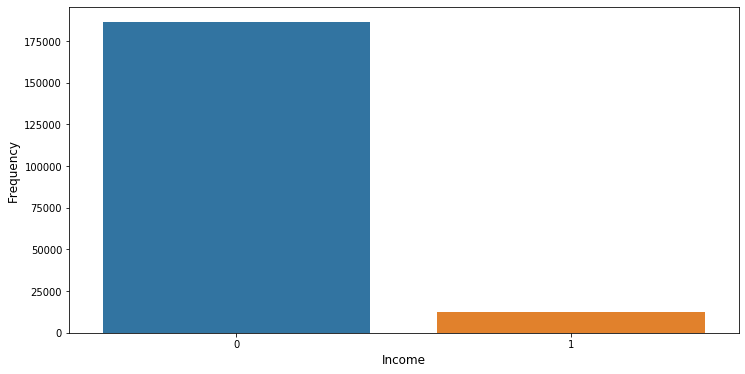

In [36]:
plt.figure(figsize =(12,6));
sns.countplot(x = 'label', data = census_df);
plt.xlabel("Income",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);

We have 93% of our data with less than 50000 income, which could lead to an imbalance set. We might have to sample fewer samples with -50000 income while training

<h3> Form the analysis done above, we can decide which columns to keep</h3>

In [37]:
keep_columns = keep_columns_categorical + keep_columns_numerical

In [38]:
keep_columns

['detailed industry recode',
 'education',
 'marital stat',
 'race',
 'hispanic origin',
 'sex',
 'full or part time employment stat',
 'tax filer stat',
 'detailed household and family stat',
 'detailed household summary in household',
 'country of birth father',
 'own business or self employed',
 'year',
 'age',
 'wage per hour',
 'capital gains',
 'capital losses',
 'dividends from stocks',
 'weeks worked in year']

In [39]:
len(keep_columns)

19

<h2>Data Prep for Models</h2>

<h3>Min Max Scaling Numerical data</h3>

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
pd.DataFrame(scaler.fit_transform(census_df[keep_columns_numerical]),columns = keep_columns_numerical).head(3)

age  wage per hour  capital gains  capital losses  \
0  0.811111            0.0            0.0             0.0   
1  0.644444            0.0            0.0             0.0   
2  0.200000            0.0            0.0             0.0   

   dividends from stocks  weeks worked in year  
0                    0.0                   0.0  
1                    0.0                   1.0  
2                    0.0                   0.0

In [41]:
census_df.head(2)

age                 class of worker detailed industry recode  \
0   73                 Not in universe                        0   
1   58  Self-employed-not incorporated                        4   

  detailed occupation recode                   education  wage per hour  \
0                          0                     HS_grad              0   
1                         34  some college but no degree              0   

  enroll in edu inst last wk marital stat          major industry code  \
0            Not in universe      widowed  Not in universe or children   
1            Not in universe    separated                 Construction   

                 major occupation code  ... country of birth father  \
0                      Not in universe  ...           united-states   
1  Precision production craft & repair  ...           united-states   

  country of birth mother country of birth self  \
0           United-States         United-States   
1           United-States         United-States   

                         citizenship own business or self employed  \
0  Native- Born in the United States                             0   
1  Native- Born in the United States                             0   

  fill inc questionnaire for veterans admin  veterans benefits  \
0                           Not in universe                  2   
1                           Not in universe                  2   

   weeks worked in year  year label  
0                     0    95     0  
1                    52    94     0  

[2 rows x 42 columns]

In [42]:
class DataFrameSelector(TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
                
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        return X[self.attribute_names]
    
    
class num_trans(TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        df = pd.DataFrame(X)
        df.columns = keep_columns_numerical 
        return df
        

In [43]:
_columns_to_be_scaled = keep_columns_numerical
_columns_to_be_scaled.append('instance weight')
_columns_to_be_scaled = list(set(_columns_to_be_scaled))
pipeline = Pipeline([('selector',DataFrameSelector(_columns_to_be_scaled)),  
                     ('scaler',MinMaxScaler()),
                    ('transform',num_trans())])

In [44]:
num_df = pipeline.fit_transform(census_df)
num_df.shape

(198649, 7)

In [75]:
num_df.columns

Index(['age', 'wage per hour', 'capital gains', 'capital losses',
       'dividends from stocks', 'weeks worked in year', 'instance weight',
       'id'],
      dtype='object')

In [45]:
num_df['id'] = pd.Series(range(num_df.shape[0]))
num_df['id'].value_counts()

2047      1
85379     1
138601    1
136552    1
159079    1
         ..
152223    1
154270    1
148125    1
150172    1
0         1
Name: id, Length: 198649, dtype: int64

In [46]:
num_df.head(2)

age  wage per hour  capital gains  capital losses  \
0  0.811111            0.0       0.089278             0.0   
1  0.644444            1.0       0.054552             0.0   

   dividends from stocks  weeks worked in year  instance weight  id  
0                    0.0                   0.0              0.0   0  
1                    0.0                   0.0              0.0   1

<h3> Creating Dummy variabels for the categories</h3>

In [47]:
# columns which I don't need after creating dummy variables dataframe

cols = keep_columns_categorical
cols.append('label')
cols = set(list(cols))
cols

{'country of birth father',
 'detailed household and family stat',
 'detailed household summary in household',
 'detailed industry recode',
 'education',
 'full or part time employment stat',
 'hispanic origin',
 'label',
 'marital stat',
 'own business or self employed',
 'race',
 'sex',
 'tax filer stat',
 'year'}

In [48]:
class dummies(TransformerMixin):
    def __init__(self,cols):
        self.cols = cols
    
    def fit(self,_X,y = None):
        return self
    
    def transform(self,_X):
        df = pd.get_dummies(_X)
        df_new = df[df.columns.difference(self.cols)] 
        #difference returns the original columns, with the columns passed as argument removed.
        return df_new

In [49]:
census_df.shape

(198649, 42)

In [50]:
pipeline_cat=Pipeline([('selector',DataFrameSelector(cols)),
                      ('dummies',dummies(cols))])
cat_df = pipeline_cat.fit_transform(census_df)

cat_df.shape

(198649, 88)

In [51]:
cat_df.head(2)

country of birth father_italy  country of birth father_mexico  \
0                              0                               0   
1                              0                               0   

   country of birth father_other  country of birth father_puerto-rico  \
0                              0                                    0   
1                              0                                    0   

   country of birth father_united-states  country of birth father_unknown  \
0                                      1                                0   
1                                      1                                0   

   detailed household and family stat_child 18+ never marr not in a subfamily  \
0                                                  0                            
1                                                  0                            

   detailed household and family stat_child <18 never marr not in subfamily  \
0                                                  0                          
1                                                  0                          

   detailed household and family stat_householder  \
0                                               0   
1                                               1   

   detailed household and family stat_nonfamily householder  ...  sex_Female  \
0                                                  0         ...           1   
1                                                  0         ...           0   

   sex_Male  tax filer stat_head of household  tax filer stat_joint both 65+  \
0         0                                 0                              0   
1         1                                 1                              0   

   tax filer stat_joint both under 65  \
0                                   0   
1                                   0   

   tax filer stat_joint one under 65 & one 65+  tax filer stat_nonfiler  \
0                                            0                        1   
1                                            0                        0   

   tax filer stat_single  year_94  year_95  
0                      0        0        1  
1                      0        1        0  

[2 rows x 88 columns]

<h3> Joining the transformed data sets</H3>

In [52]:
cat_df['id'] = pd.Series(range(cat_df.shape[0]))
cat_df.head(2)
cat_df['id'].value_counts()

138254.0    1
13730.0     1
109549.0    1
110923.0    1
115212.0    1
           ..
165494.0    1
8490.0      1
43645.0     1
72542.0     1
0.0         1
Name: id, Length: 197777, dtype: int64

In [53]:
print(cat_df['label_0'].value_counts())
print(cat_df['label_1'].value_counts())

1    186324
0     12325
Name: label_0, dtype: int64
0    186324
1     12325
Name: label_1, dtype: int64


In [54]:
final_df = pd.merge(cat_df,num_df,how = 'inner', on = 'id')
print(f"Number of observations in final dataset: {final_df.shape}")

Number of observations in final dataset: (197777, 96)


<H3>Solving Imabalnced Set</H3>
We have an imbalanced set with people below income of 50k being more than 93% of data<br>
Let us remedy that by sampling fewer from that part of the dataset

In [72]:
_df_below_50k = final_df.loc[final_df['label_1'] == 0]
_df_above_50k = final_df.loc[final_df['label_1'] == 1]
_df_below_50k['instance weight'].shape

(185514,)

In [77]:
_stratified_census_below_50k_df = _df_below_50k.groupby('instance weight', group_keys=False).apply(lambda x: x.sample(min(len(x), 65000)))

In [78]:
_stratified_census_below_50k_df.shape

(71874, 96)

In [79]:
_frames = [_stratified_census_below_50k_df, _df_above_50k]
stratified_final_census_df = pd.concat(_frames)

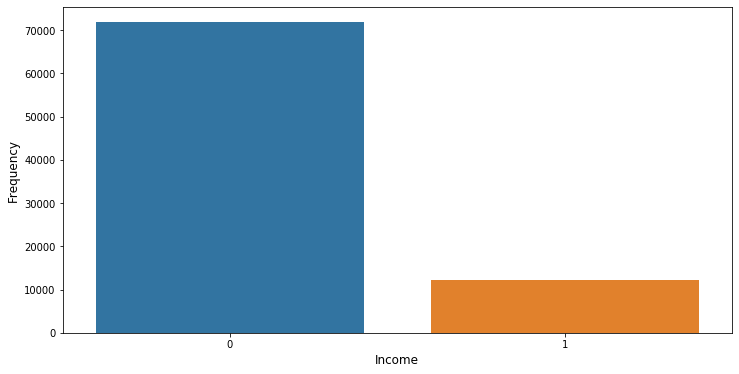

In [82]:
plt.figure(figsize =(12,6));
sns.countplot(x = 'label_1', data = stratified_final_census_df);
plt.xlabel("Income",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);

In [83]:
print(f"--------------------label_1-------------------------")
_total= stratified_final_census_df['label_1'].value_counts()
_percent = (stratified_final_census_df['label_1'].value_counts() / stratified_final_census_df.shape[0]) * 100
_df = pd.concat([_total,_percent],keys = ['total','percent'], axis = 1)
print(_df)
print('\n')

--------------------label_1-------------------------
   total    percent
0  71874  85.424962
1  12263  14.575038




<h3> Final feature set</h3>

In [84]:
stratified_final_census_df.columns

Index(['country of birth father_italy', 'country of birth father_mexico',
       'country of birth father_other', 'country of birth father_puerto-rico',
       'country of birth father_united-states',
       'country of birth father_unknown',
       'detailed household and family stat_child 18+ never marr not in a subfamily',
       'detailed household and family stat_child <18 never marr not in subfamily',
       'detailed household and family stat_householder',
       'detailed household and family stat_nonfamily householder',
       'detailed household and family stat_other',
       'detailed household and family stat_secondary individual',
       'detailed household and family stat_spouse of householder',
       'detailed household summary in household_child 18 or older',
       'detailed household summary in household_child under 18 ever married',
       'detailed household summary in household_child under 18 never married',
       'detailed household summary in household_group qu

Removing weight, id and label columns form the set

In [85]:
y = stratified_final_census_df['label_1']
stratified_final_census_df.drop(labels = ['id', 'label_1', 'label_0', 'instance weight'],axis = 1,inplace = True)
X = stratified_final_census_df

In [86]:
X.shape

(84137, 92)

In [87]:
y

86181     0
34714     0
112908    0
130573    0
72567     0
         ..
197705    1
197722    1
197757    1
197762    1
197770    1
Name: label_1, Length: 84137, dtype: uint8

making note of the formula used for min max scaling <br>
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0)) <br>
X_scaled = X_std * (max - min) + min <br>

<h2>Model Fitting</h2>

In [89]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, auc
from sklearn.feature_selection import RFE

In [90]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25,random_state = 51)

In [91]:
#Instantiate the classifiers
clf_logreg = LogisticRegression()
clf_tree = DecisionTreeClassifier()
clf_knn =  KNeighborsClassifier()
clf_svc = SVC()
clf_forest = RandomForestClassifier()
clf_ada = AdaBoostClassifier()
clf_bagging = BaggingClassifier()
clf_extratrees = ExtraTreesClassifier()
clf_gnb = GaussianNB()

In [92]:
classifiers = ['LogisticRegression', 'DecisionTree', 'KNN', 'SVC', 'RandomForest', 'Adaboost', 'Bagging', 'Extratrees', 'Naive']

In [93]:
models = {clf_logreg:'LogisticRegression',
          clf_tree:'DecisionTree',
          clf_knn: 'KNN',
          clf_svc: 'SVC',
          clf_forest: 'RandomForest',
          clf_ada: 'Adaboost',
          clf_bagging: 'Bagging',
          clf_extratrees:'Extratrees' ,
          clf_gnb: 'Naive'}

In [101]:
# train function fits the model and returns accuracy score
def train(algo,name,X_train,y_train,X_test,y_test):
    algo.fit(X_train,y_train)
    y_pred = algo.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print(f"--------------------------------------------{name}---------------------------------------------------")
    print(f"Accuracy Score for {name}: {score*100:.4f}%")
    return y_test,y_pred,score

# acc_res function calculates confusion matrix
def acc_res(y_test,y_pred):
    null_accuracy = y_test.value_counts()[0]/len(y_test)
    print(f"Null Accuracy: {null_accuracy*100:.4f}%")
    print("Confusion Matrix")
    matrix = confusion_matrix(y_test,y_pred)
    print(matrix)
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    TN = matrix[0,0]
    FP = matrix[0,1]
    FN = matrix[1,0]
    TP = matrix[1,1]
    accuracy_score=(TN+TP) / float(TP+TN+FP+FN)
    recall_score = (TP)/ float(TP+FN)
    specificity = TN / float(TN+FP)
    FPR = FP / float(FP+TN)
    precision_score = TP / float(TP+FP)
    print(f"Accuracy Score: {accuracy_score*100:.4f}%")
    print(f"Recall Score: {recall_score*100:.4f}%")
    print(f"Specificity Score: {specificity*100:.4f}%")
    print(f"False Positive Rate: {FPR*100:.4f}%")
    print(f"Precision Score: {precision_score*100:.4f}%")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("Classification Report")
    print(classification_report(y_test,y_pred))
    
def main(models):
    accuracy_scores = []
    for algo,name in models.items():
        _start_trial_models = datetime.now()
        y_test_train,y_pred,acc_score = train(algo,name,X_train,y_train,X_test,y_test)
        acc_res(y_test_train,y_pred)
        accuracy_scores.append(acc_score)
        experiment_elapsed_time = datetime.now() - _start_trial_models
        print("Time Elapsed: {}".format(str(experiment_elapsed_time)))
    return accuracy_scores


accuracy_scores = main(models)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


--------------------------------------------LogisticRegression---------------------------------------------------
Accuracy Score for LogisticRegression: 89.3701%
Null Accuracy: 85.6287%
Confusion Matrix
[[17381   631]
 [ 1605  1418]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 89.3701%
Recall Score: 46.9070%
Specificity Score: 96.4968%
False Positive Rate: 3.5032%
Precision Score: 69.2045%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     18012
           1       0.69      0.47      0.56      3023

    accuracy                           0.89     21035
   macro avg       0.80      0.72      0.75     21035
weighted avg       0.88      0.89      0.88     21035

Time Elapsed: 0:00:00.811049
--------------------------------------------DecisionTree-------------------------------------------------

<h2>Model Evaluation</h2>

In [102]:
pd.DataFrame(accuracy_scores,columns = ['Accuracy Scores'],index = classifiers).sort_values(by = 'Accuracy Scores',
                                                                                            ascending = False)

Accuracy Scores
LogisticRegression         0.893701
Adaboost                   0.892940
SVC                        0.891799
RandomForest               0.883527
Bagging                    0.878773
KNN                        0.878393
Extratrees                 0.874305
DecisionTree               0.844830
Naive                      0.626385

Let's pick the best performing models <br>
Note: LogisticRegression not picked because of the Convergence issue

In [103]:
models_new = {clf_svc: 'SVC',        
              clf_forest: 'RandomForest',
              clf_ada: 'Adaboost',
              clf_bagging: 'Bagging'}

classifiers_new = models_new.values()

Let's try doing K-folds cross validation for training.

In [104]:
mean_score = []
for model,value in models_new.items():
    start_time = datetime.now()
    scores = cross_val_score(model,X_train,y_train,scoring = 'accuracy',cv = 10)
    elapsed_time = datetime.now() - start_time
    print(f"Time taken to complete training {value} model: (hh:mm:ss.ms) {elapsed_time}")
    mean_score.append(scores.mean())

Time taken to complete training SVC model: (hh:mm:ss.ms) 0:37:42.724025
Time taken to complete training RandomForest model: (hh:mm:ss.ms) 0:01:08.812114
Time taken to complete training Adaboost model: (hh:mm:ss.ms) 0:00:42.235399
Time taken to complete training Bagging model: (hh:mm:ss.ms) 0:00:43.765968


In [105]:
pd.DataFrame(mean_score,index = classifiers_new,
             columns = ['Accuracy Score']).sort_values(by = 'Accuracy Score', ascending = False)

Accuracy Score
Adaboost            0.891937
SVC                 0.891794
RandomForest        0.882650
Bagging             0.876470

It looks like SVC and Adaboost are giving comparable results.<br>
We will pick Adaboost for production

In [106]:
name = 'Adaboost'
clf_ada.fit(X_train,y_train)
y_pred = clf_ada.predict(X_test)
score = accuracy_score(y_test,y_pred)
print(f"--------------------------------------------{name}---------------------------------------------------")
print(f"Accuracy Score for {name}: {score*100:.4f}%")

--------------------------------------------Adaboost---------------------------------------------------
Accuracy Score for Adaboost: 89.2940%


<h2>Persisting Model</h2>

In [112]:
from joblib import dump, load
_time = str(datetime.now())
_time = _time.replace(" ", "")
_time = _time.replace(":", "_")
_time = _time.replace("_", "_")
model_name = "Adaboost_"+_time+".joblib"

dump(clf_ada, model_name) 

['Adaboost_2020-06-0811_22_49.284032.joblib']

<h2>Looking at what the expected columns are for the model</h2>

In [113]:
X_train.columns

Index(['country of birth father_italy', 'country of birth father_mexico',
       'country of birth father_other', 'country of birth father_puerto-rico',
       'country of birth father_united-states',
       'country of birth father_unknown',
       'detailed household and family stat_child 18+ never marr not in a subfamily',
       'detailed household and family stat_child <18 never marr not in subfamily',
       'detailed household and family stat_householder',
       'detailed household and family stat_nonfamily householder',
       'detailed household and family stat_other',
       'detailed household and family stat_secondary individual',
       'detailed household and family stat_spouse of householder',
       'detailed household summary in household_child 18 or older',
       'detailed household summary in household_child under 18 ever married',
       'detailed household summary in household_child under 18 never married',
       'detailed household summary in household_group qu